<a href="https://colab.research.google.com/github/Aravind863/datascience-assignments/blob/main/EDA1_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Missing Values:
LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


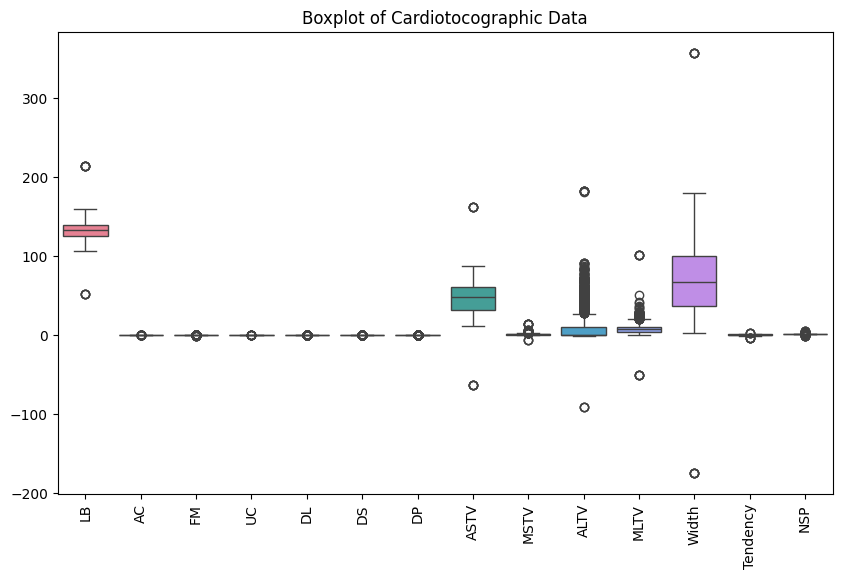

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the dataset
data = pd.read_csv('Cardiotocographic.csv')

# Step 2: Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

# Step 3: Handle missing values (if any)
# For example, you can fill missing values with the mean or median:
# data.fillna(data.mean(), inplace=True)

# Step 4: Detect outliers
# You can use box plots or scatter plots to visualize outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=data)
plt.title("Boxplot of Cardiotocographic Data")
plt.xticks(rotation=90)
plt.show()

# Step 5: Remove outliers (if necessary)
# You can use statistical methods like z-score or IQR to detect and remove outliers
# For example, using z-score:
from scipy import stats
z_scores = stats.zscore(data)
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data = data[filtered_entries]

# Step 6: Perform data preparation (if necessary)
# This may include encoding categorical variables, feature scaling, etc.

# Step 7: Save cleaned data (optional)
# data.to_csv('cleaned_data.csv', index=False)

# Step 8: Further analysis or modeling can be performed on the cleaned dataset

**Statistical summary**

In [2]:
# Step 1: Import necessary libraries
import pandas as pd

# Step 2: Load the dataset
data = pd.read_csv('Cardiotocographic.csv')

# Step 3: Statistical summary
summary = data.describe()

# Step 4: Calculate additional statistics such as median and interquartile range
median = data.median()
interquartile_range = data.quantile(0.75) - data.quantile(0.25)

# Step 5: Add median and interquartile range to the summary
summary.loc['median'] = median
summary.loc['interquartile_range'] = interquartile_range

# Step 6: Print the statistical summary
print("Statistical Summary:")
print(summary)

# Step 7: Highlight interesting findings

# Example of highlighting interesting findings
print("\nInteresting Findings:")
for col in data.columns:
    if summary.loc['mean', col] > summary.loc['median', col]:
        print(f"The mean of '{col}' is higher than the median, indicating positive skewness.")
    elif summary.loc['mean', col] < summary.loc['median', col]:
        print(f"The mean of '{col}' is lower than the median, indicating negative skewness.")
    else:
        print(f"The mean and median of '{col}' are approximately equal, indicating symmetrical distribution.")
    if summary.loc['std', col] > 2 * summary.loc['interquartile_range', col]:
        print(f"The standard deviation of '{col}' is large, indicating high variability.")
    elif summary.loc['std', col] < 0.5 * summary.loc['interquartile_range', col]:
        print(f"The standard deviation of '{col}' is small, indicating low variability.")
    else:
        print(f"The standard deviation of '{col}' is moderate, indicating moderate variability.")

Statistical Summary:
                              LB           AC           FM           UC  \
count                2105.000000  2106.000000  2126.000000  2126.000000   
mean                  133.343598     0.003219     0.009894     0.004391   
std                    11.270154     0.004391     0.067540     0.003340   
min                    51.842487    -0.019284    -0.480634    -0.014925   
25%                   126.000000     0.000000     0.000000     0.001851   
50%                   133.000000     0.001634     0.000000     0.004484   
75%                   140.000000     0.005650     0.002567     0.006536   
max                   214.000000     0.038567     0.961268     0.030002   
median                133.000000     0.001634     0.000000     0.004484   
interquartile_range    14.000000     0.005650     0.002567     0.004685   

                              DL           DS           DP         ASTV  \
count                2126.000000  2105.000000  2105.000000  2126.000000   
mea

**Data Visualization**

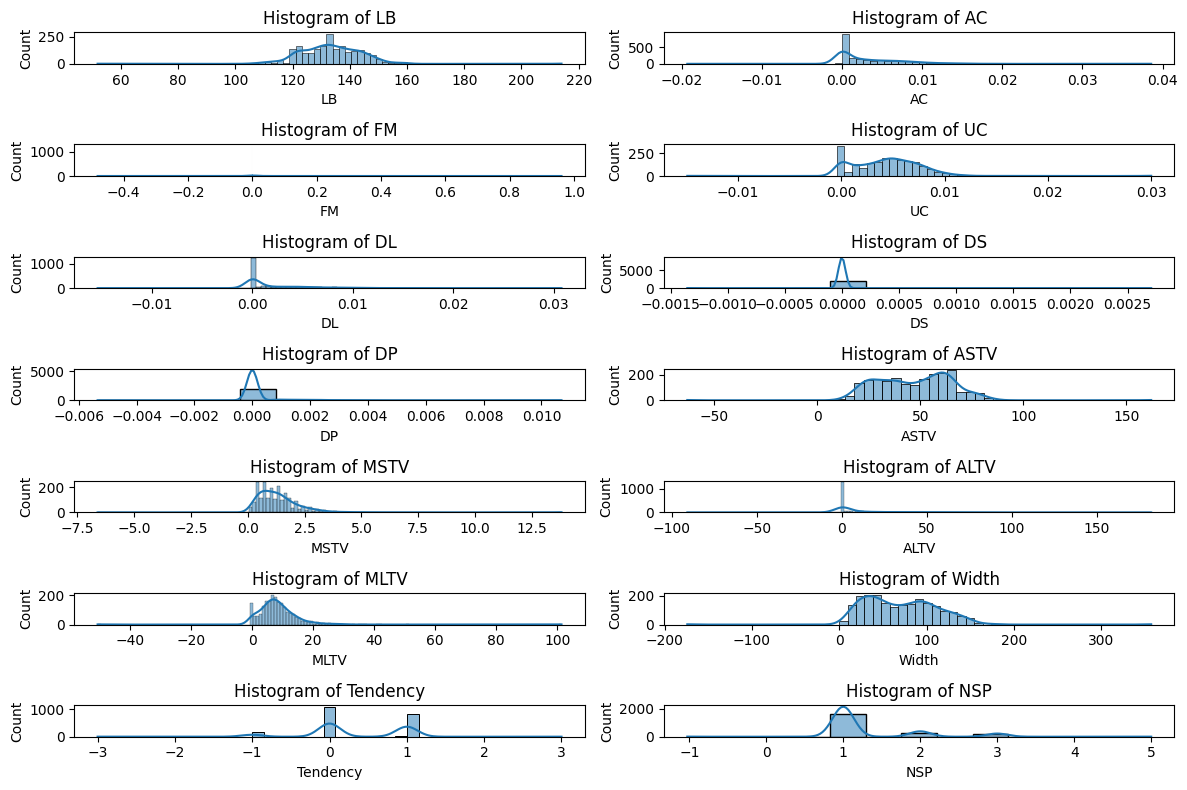

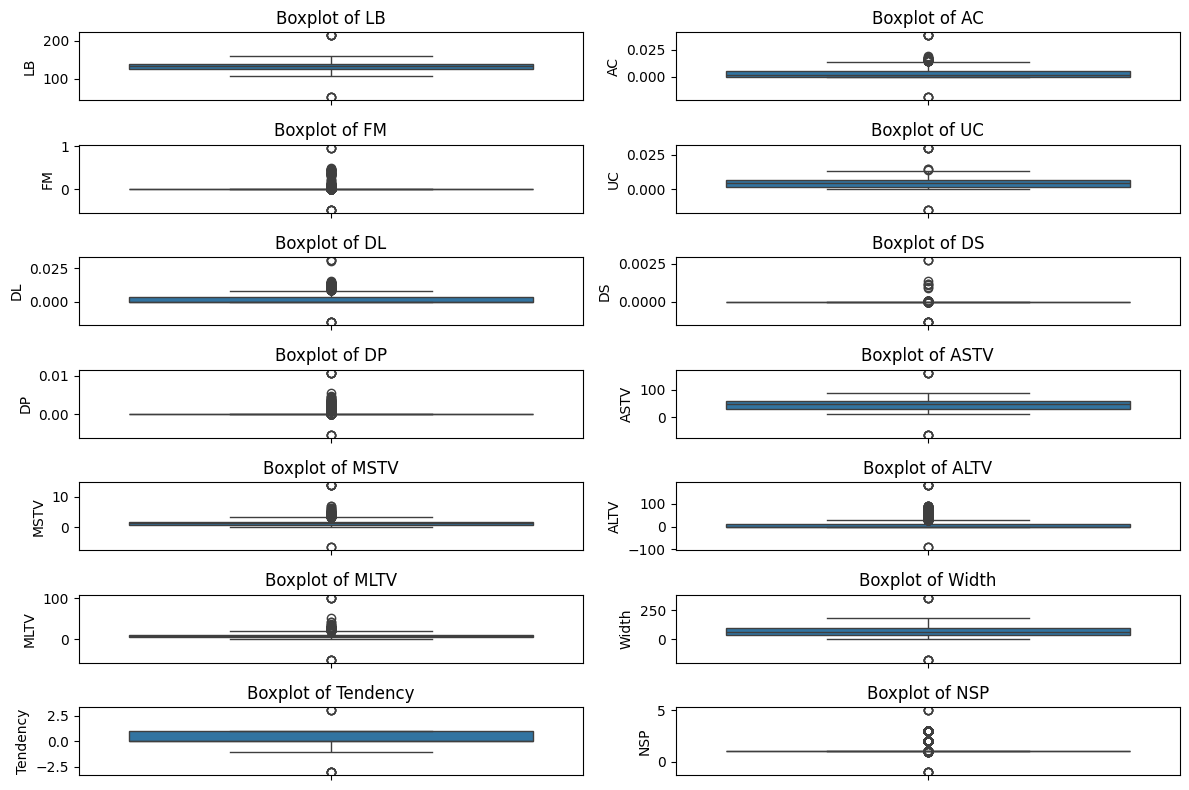

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Step 1: Load the dataset
data = pd.read_csv('Cardiotocographic.csv')

# Step 2: Visualize numerical variables
numerical_variables = data.select_dtypes(include=['int64', 'float64']).columns
num_numerical_variables = len(numerical_variables)
num_subplot_rows = math.ceil(num_numerical_variables / 2)  # Adjust rows based on the number of numerical variables

# Histograms for numerical variables
plt.figure(figsize=(12, 8))
for i, var in enumerate(numerical_variables):
    plt.subplot(num_subplot_rows, 2, i+1)  # Adjust subplots dynamically
    sns.histplot(data[var], kde=True)
    plt.title(f'Histogram of {var}')
plt.tight_layout()
plt.show()

# Boxplots for numerical variables
plt.figure(figsize=(12, 8))
for i, var in enumerate(numerical_variables):
    plt.subplot(num_subplot_rows, 2, i+1)  # Adjust subplots dynamically
    sns.boxplot(data[var])
    plt.title(f'Boxplot of {var}')
plt.tight_layout()
plt.show()

<ipython-input-4-78cabb30b7ac>:20: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


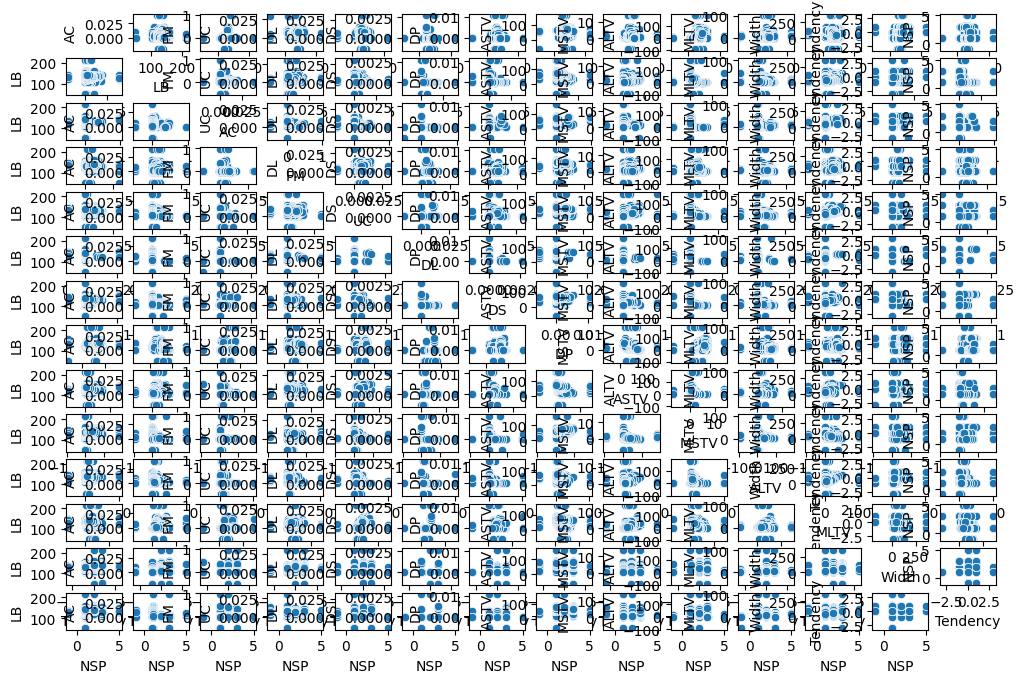

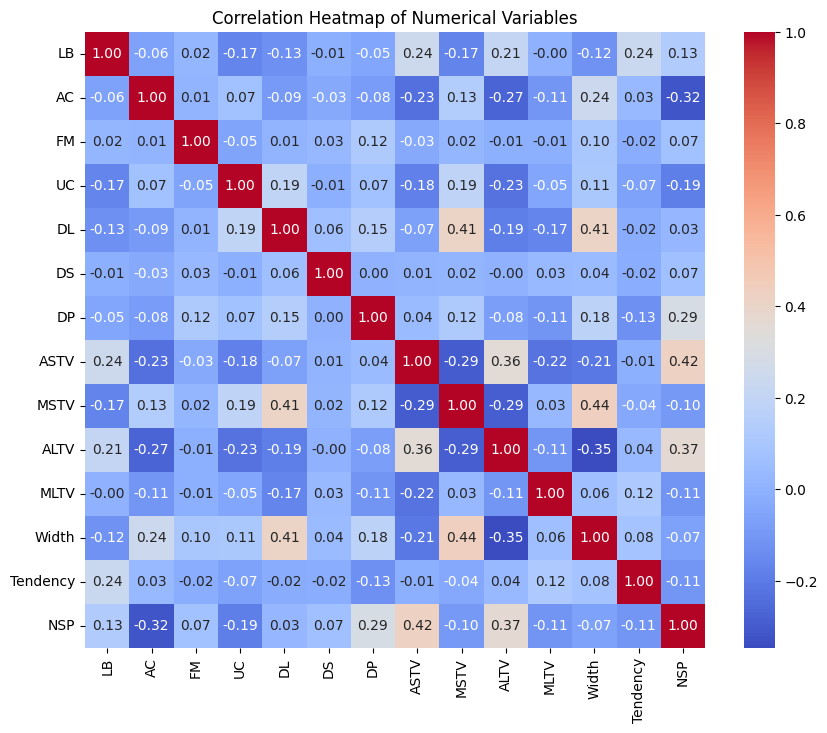

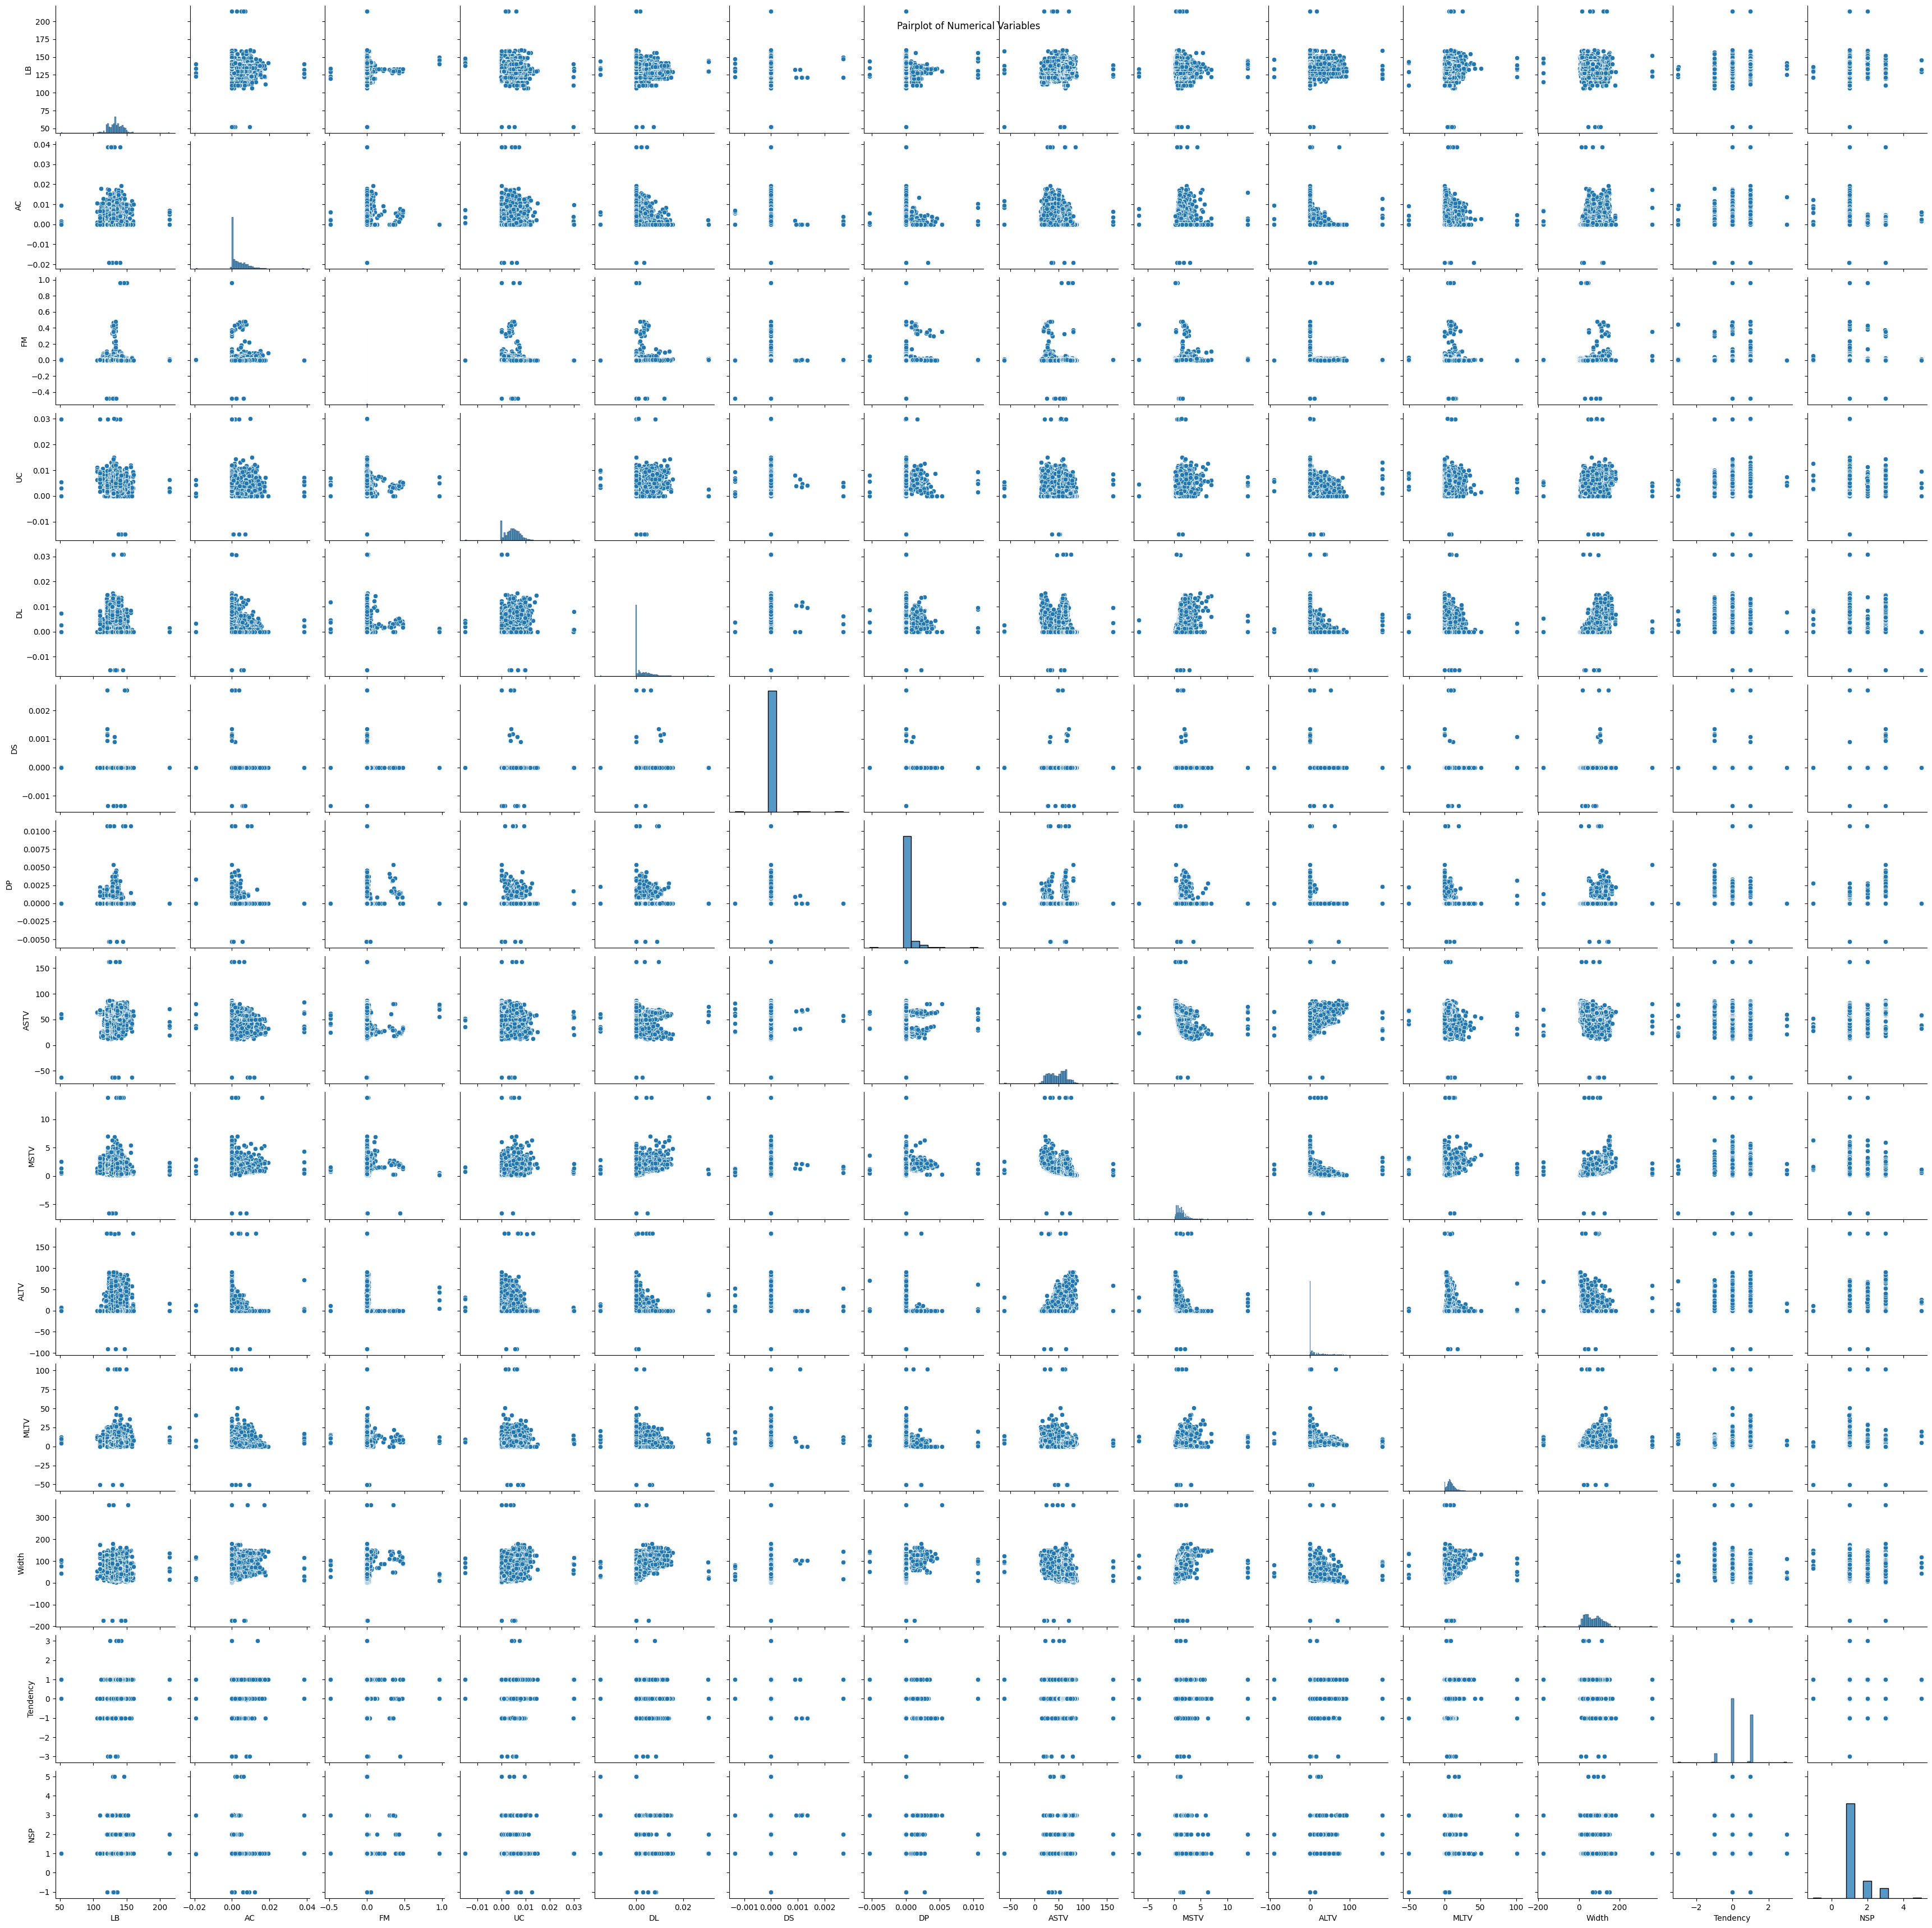

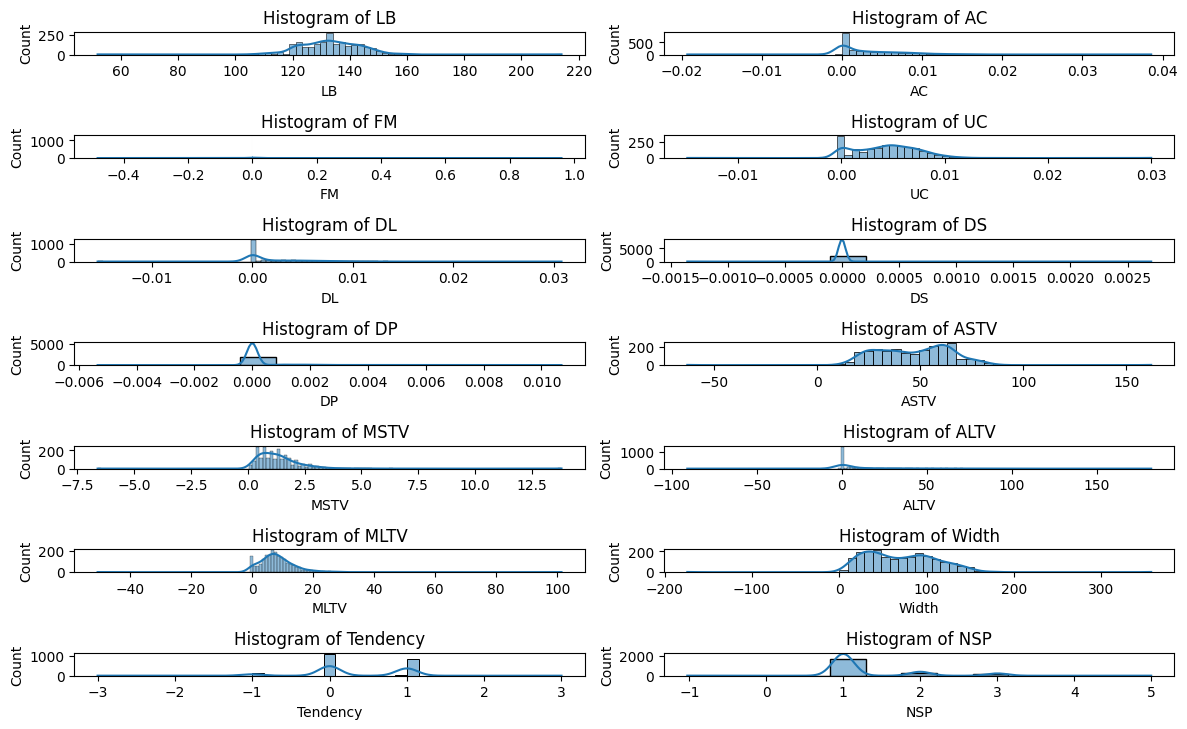

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the dataset
data = pd.read_csv('Cardiotocographic.csv')

# Step 2: Explore relationships between pairs of numerical variables
numerical_variables = data.select_dtypes(include=['int64', 'float64']).columns

# Scatter plots for numerical variables
plt.figure(figsize=(12, 8))
for i, var1 in enumerate(numerical_variables):
    for j, var2 in enumerate(numerical_variables):
        if i != j:
            plt.subplot(len(numerical_variables), len(numerical_variables), i * len(numerical_variables) + j + 1)
            sns.scatterplot(x=var1, y=var2, data=data)
            plt.xlabel(var1)
            plt.ylabel(var2)
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_variables].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

# Step 3: Employ advanced visualization techniques
# Pair plot
sns.pairplot(data[numerical_variables])
plt.suptitle("Pairplot of Numerical Variables")
plt.show()

# Histograms for numerical variables
plt.figure(figsize=(12, 8))
for i, var in enumerate(numerical_variables):
    plt.subplot(len(numerical_variables)//2 + 1, 2, i+1)
    sns.histplot(data[var], kde=True)
    plt.title(f'Histogram of {var}')
plt.tight_layout()
plt.show()


**pattern recognition and insights**

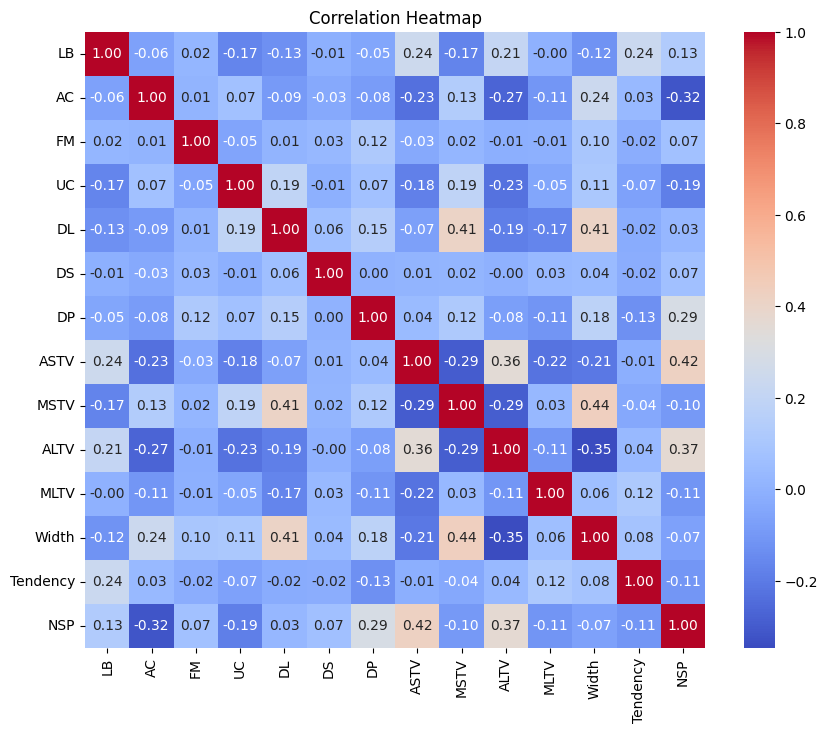

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the dataset
data = pd.read_csv('Cardiotocographic.csv')

# Step 2: Correlation Analysis
correlation_matrix = data.corr()

# Visualize correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()